# Exercise 1 - introducing t-test 

You have already learned about the the command line, scripts, and functions. R has one more level of organisation. Packages. Packages are sets of functions. We have already used one of these. Packages can also include data. We are now going to install a package, load it, and use it just for it's data. 

The package level is what makes R so powerful as a an open source language. you can make a package, get it reviewed, and have it stored on CRAN (Comprehensive R Archive Network) where everyone can download it. This means that R is an active environment for the development of statistical methods and theory.

Description of the package here: https://simplystatistics.org/2018/01/22/the-dslabs-package-provides-datasets-for-teaching-data-science/

In [2]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [3]:
library('dplyr')
library('ggplot2')
library('dslabs')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Let's conduct an analysis of the height data - self-reported heights in inches

In [7]:
data('heights')

This gives us a data frame.

In [8]:
str(heights)

'data.frame':	1050 obs. of  2 variables:
 $ sex   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 2 ...
 $ height: num  75 70 68 74 61 65 66 62 66 67 ...


First let's make frequency distributions for the women and men seperately.

You can make some quick and dirty separate plots using a basic function and indexing...

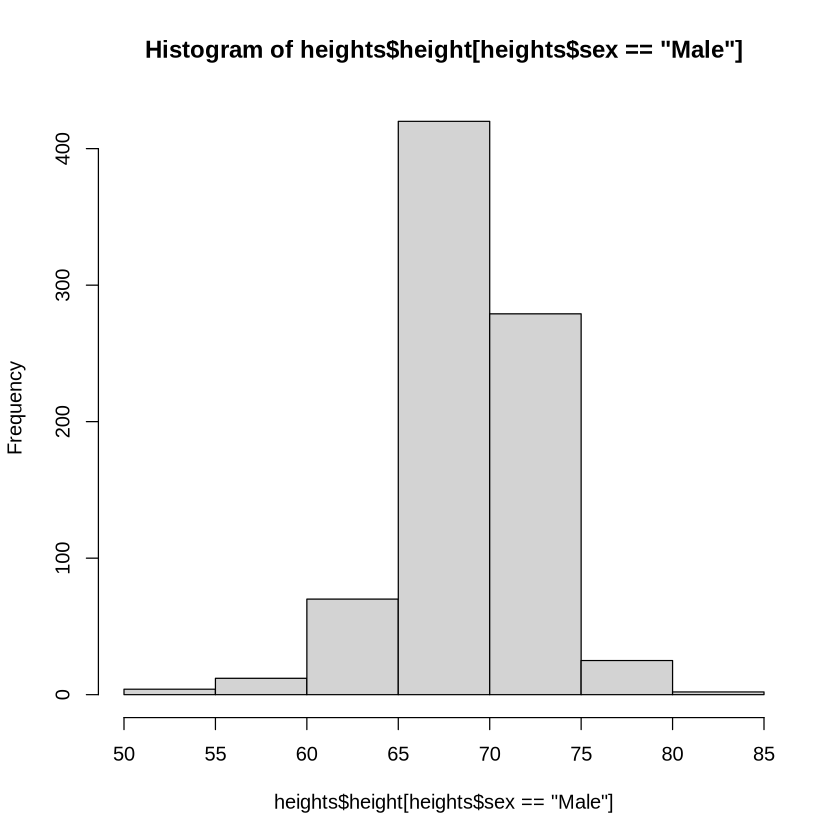

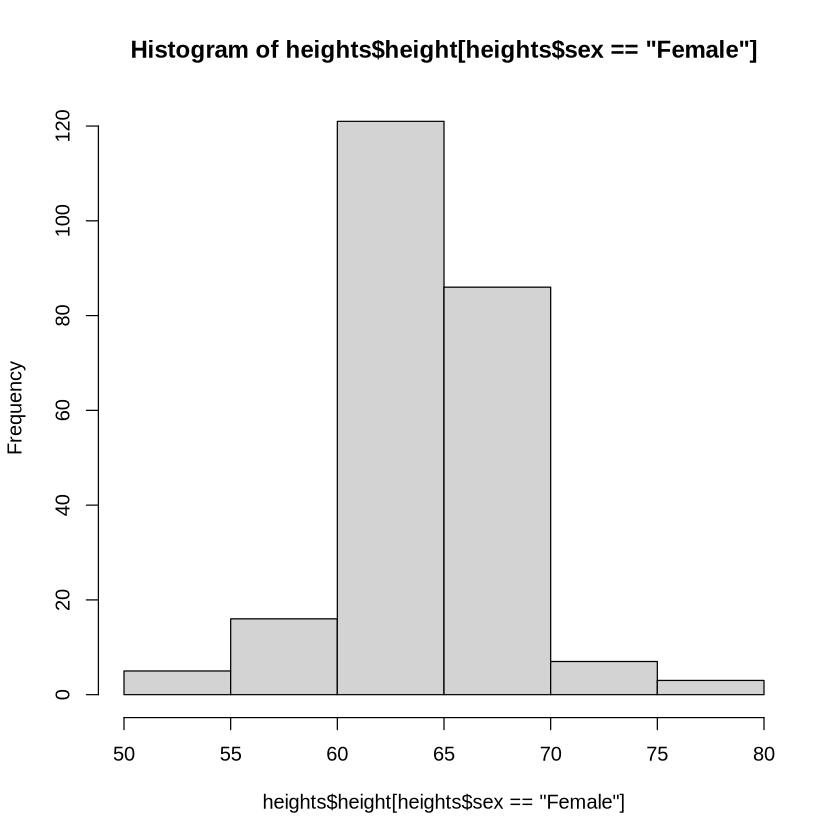

In [12]:
hist(heights$height[heights$sex=="Male"])
hist(heights$height[heights$sex=="Female"])

... though it would be better if we could see all the data together on the same histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


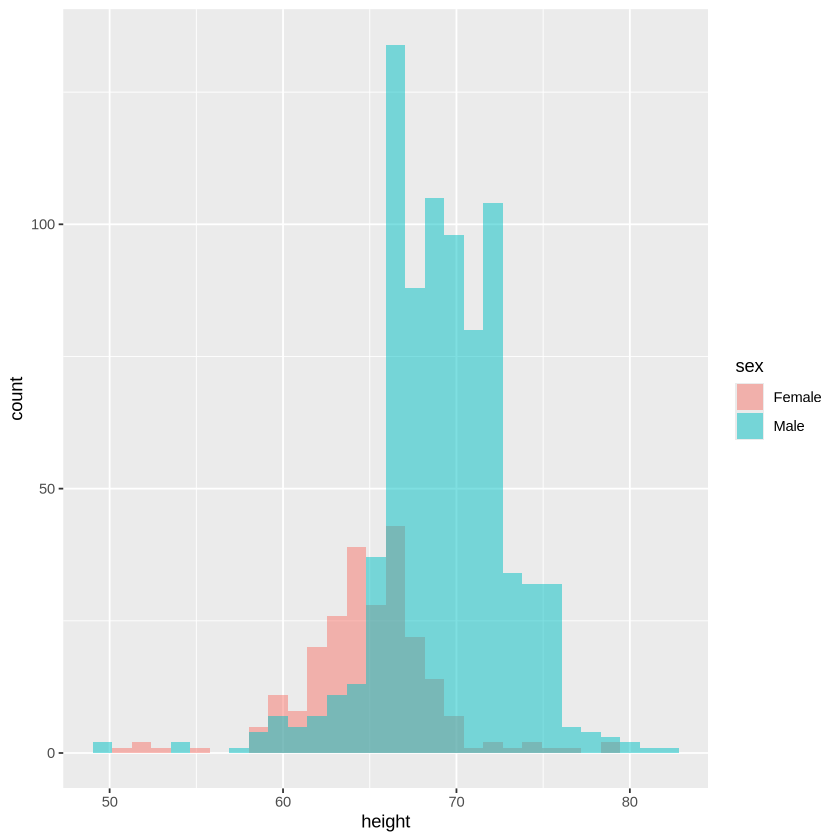

In [17]:
ggplot(heights,
       aes(x=height,
           fill=sex)) +
    geom_histogram(position='identity',
                  alpha=0.5)

In [20]:
stats_table <- heights %>%
    group_by(sex) %>%
    summarize(Mean_height = mean(height),
            Median_height = median(height),
            Standard_deviation = sd(height))

Let's look at the summary statistics - you can actually make them in 1 table!

In [21]:
stats_table

sex,Mean_height,Median_height,Standard_deviation
<fct>,<dbl>,<dbl>,<dbl>
Female,64.93942,64.98031,3.760656
Male,69.31475,69.00000,3.611024


In [22]:
shapiro.test(heights$height[heights$sex=="Male"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Male"]
W = 0.96374, p-value = 2.623e-13


In [23]:
shapiro.test(heights$height[heights$sex=="Female"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Female"]
W = 0.94255, p-value = 4.671e-08


Lets try visualising the data in terms of probability distributions

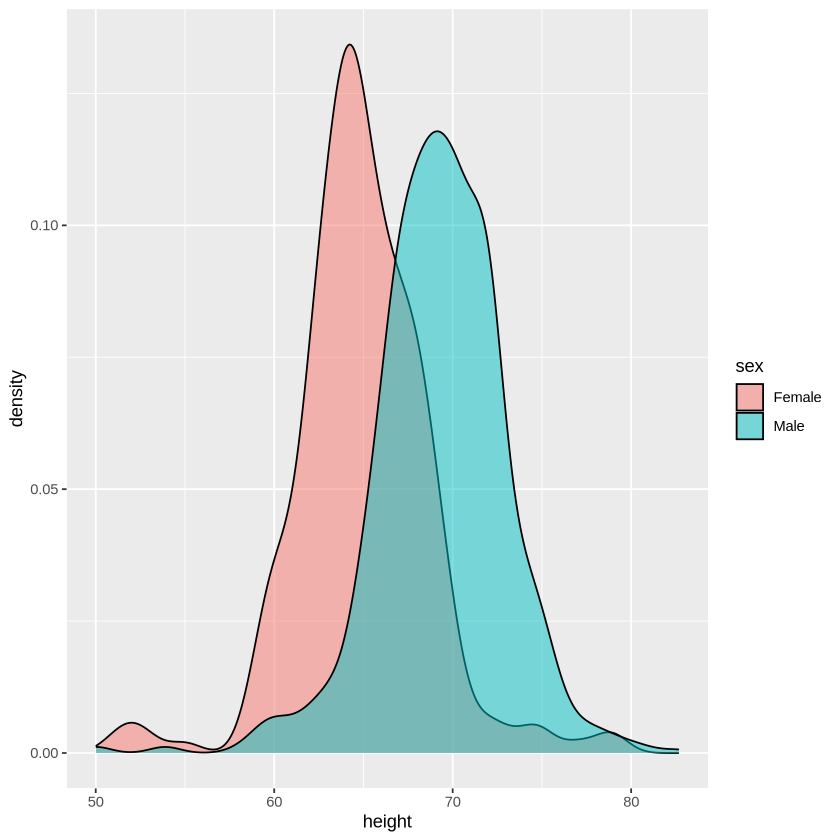

In [26]:
ggplot(heights,
      aes(x = height,
         fill = sex)) +
    geom_density(alpha=0.5)

Now we are ready to run a hypothesis test. Are men taller than women? What sort of t test should we do?

In [27]:
t.test(height ~ sex, data=heights)


	Welch Two Sample t-test

data:  height by sex
t = -15.925, df = 374.41, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -4.915553 -3.835108
sample estimates:
mean in group Female   mean in group Male 
            64.93942             69.31475 


# Exercise 2 - Some more messy real world data

We have been dealing with data that is fairly well organised. Let's look at some data that is slightly more messy

Install and load the fuelconomy package, which has fuel economy data from the EPA: https://cran.r-project.org/web/packages/fueleconomy/fueleconomy.pdf

Let's set ourselves the task of comparing the city fuel economy of the midsize class of two car brands: Audi and VW

Our first step is to isolate the relevant data. There are many ways to do this. Here's one:

How many cars do we have in each group?

Let's use t.test to compare performance of the two cars

Let's visualise the data and see if this is the best way to ask our question

We see that a normal distribution is an okay model for our data, but perhaps not the best one. We can see something important happening in the tails suggesting there is important structure we will miss.

Let's investigate that structure

Let's make a scatterplot